In [1]:
import pandas as pd
import youtube_dl
import os
from pytube import extract
from yt_dlp import YoutubeDL

In [2]:
info_download = pd.read_parquet('downloads_status.parquet')
videos_mtdta = pd.read_parquet('../Data_collection/data/videos_metadata.parquet')

In [3]:
info_download.groupby(by = ['Status'], dropna=True).count()

,Channel,Video_url
Status,,
Downloaded,36086,36086
Error,990,990
Exceed length,8495,8495


In [4]:
videos_mtdta.head(5)

,title,id,length,views,description,keywords,age_restricted,author,pub_date,raiting,channel,url
0,Drones en la agricultura: sensores voladores p...,grTRnHWDFeU,88,108,Los drones son sensores remotos muy útiles en ...,b'[]',False,UPA - Unión de Pequeños Agricultores y Ganaderos,2022-10-24,None,UPA_Federal,youtube.com/watch?v=grTRnHWDFeU
1,Conocemos cómo funciona una miniturbina que pr...,cyhdsw2kkiA,176,133,Gracias al programa de formación en digitaliza...,b'[]',False,UPA - Unión de Pequeños Agricultores y Ganaderos,2022-10-24,None,UPA_Federal,youtube.com/watch?v=cyhdsw2kkiA
2,Analizamos un pivot de riego inteligente que o...,Gfe2IIHOe3g,148,130,"Sensores de humedad, cámaras que analizan el e...",b'[]',False,UPA - Unión de Pequeños Agricultores y Ganaderos,2022-10-24,None,UPA_Federal,youtube.com/watch?v=Gfe2IIHOe3g
3,Conocemos en Córdoba las últimas tecnologías d...,hOR8S5ZnhTM,370,177,Desde seleccionadores automáticos para aceitun...,b'[]',False,UPA - Unión de Pequeños Agricultores y Ganaderos,2022-10-24,None,UPA_Federal,youtube.com/watch?v=hOR8S5ZnhTM
4,Así funciona CalculaPAC: la herramienta de UPA...,gAnD56tcIOQ,2134,13159,CalculaPAC 2023 es una aplicación a modo de he...,b'[]',False,UPA - Unión de Pequeños Agricultores y Ganaderos,2022-10-07,None,UPA_Federal,youtube.com/watch?v=gAnD56tcIOQ


In [28]:
print(f'---Max video length in minutes: {videos_mtdta.length.max()/60}')
max_ = videos_mtdta[['channel','url']].iloc[videos_mtdta.length.idxmax()]
print(f'in {max_}')
print(f'---Min video length in minutes: {videos_mtdta.length.min()/60}')
min_ = videos_mtdta[['channel','url']].iloc[videos_mtdta.length.idxmin()]
print(f'in {min_}')




---Max video length in minutes: 719.5833333333334
in channel          uiltrasportinazionale5767
url        youtube.com/watch?v=_Z8CEU21CHc
Name: 44190, dtype: object
---Min video length in minutes: 0.016666666666666666
in channel                      CCOO_Canarias
url        youtube.com/watch?v=rbLTm4voFP0
Name: 13048, dtype: object


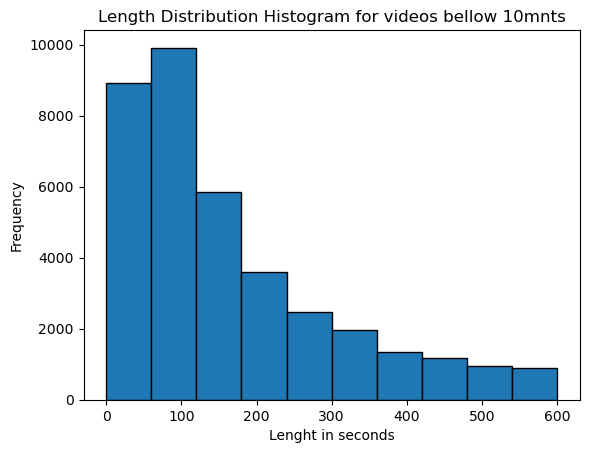

In [36]:
import matplotlib.pyplot as plt

#create histogram for points variable
figure=plt.figure(1)
plt.hist(videos_mtdta['length'], edgecolor='black',range=[0,600])
plt.xlabel('Length in seconds')
plt.ylabel('Frequency')
plt.title('Length Distribution Histogram for videos bellow 10mnts')
plt.show()

In [46]:
## Count how many videos there are with less than 10 mintus of length 
print('There are {} total videos which length is less that 10 min'.format((videos_mtdta['length']<= 600).sum()))
print('We collected only {}'.format((info_download['Status']=='Downloaded').sum()))
print('Missing {}'.format((info_download['Status']=='Error').sum()))

There are 37076 total videos which length is less that 10 min
We collected only 36086
Missing 990


In [48]:
error_videos = info_download[info_download['Status']=='Error']
error_videos.shape

(990, 3)

In [49]:
error_videos

,Channel,Video_url,Status
3990,avantarvideos,https://www.youtube.com/watch?v=bvCTTZeflxI,Error
3993,avantarvideos,https://www.youtube.com/watch?v=28wztaJVvrg,Error
9479,ccoo,https://www.youtube.com/watch?v=fki27FRuUvg,Error
12006,ccoocyl,https://www.youtube.com/watch?v=vQQ19Gtnxx0,Error
12129,ccoocyl,https://www.youtube.com/watch?v=RAS6Qmrfo-k,Error
...,...,...,...
28986,UnionenTV,https://www.youtube.com/watch?v=J2m0rXO3wPE,Error
29664,Legeforeningen,https://www.youtube.com/watch?v=N4i9uh_66z8,Error
30747,industriEnergi,https://www.youtube.com/watch?v=MqpbL-S_J-U,Error
36785,cgilprato5615,https://www.youtube.com/watch?v=gi-G4j4HPAY,Error


In [50]:
def video_download(url:str, target_path:str):
    ydl_opts = {'outtmpl': 'Videos/' + '%(id)s-%(format_id)s.%(ext)s','format': 'mp4',
    'concurrent-fragments':8}
    with YoutubeDL(ydl_opts) as ydl:
        ydl.download([str(url)]) # Downloads the best format by default 

In [51]:
!pwd

/Users/pauor506/Documents/CDHU/June2022:Dec2022/Pilots/Youtube_Katrin/Code/prototyping


In [52]:
video_download('https://www.youtube.com/watch?v=bvCTTZeflxI', '/Videos')

[youtube] Extracting URL: https://www.youtube.com/watch?v=bvCTTZeflxI
[youtube] bvCTTZeflxI: Downloading webpage
[youtube] bvCTTZeflxI: Downloading android player API JSON
[youtube] bvCTTZeflxI: Downloading MPD manifest
[youtube] bvCTTZeflxI: Downloading MPD manifest
[info] bvCTTZeflxI: Downloading 1 format(s): 22
[download] Destination: Videos/bvCTTZeflxI-22.mp4
[download] 100% of  162.42MiB in 00:00:33 at 4.84MiB/s   
